In [1]:
from utils import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# print(get_algorithms_classes(Experiment.bell_state_reach, "convex"))

In [3]:
dump_all_summary_specs()

In [4]:
dump_summary_table("bellman", save=True)
dump_summary_table("convex", save=True)

,experiment,horizon,#hard.,#emb.,#diff. algo.,#improv.,max. improv.,avg. build time,max. build time,avg. method time,max. method time
0,state discr.,3,55,109,283,324,0.24214,0.07064,0.66560,3.10020,12.0
1,Bell state reach,3,45,136,7,135,0.24732,0.68428,3.21318,2.46314,8.0
2,Reset,3,55,109,116,296,0.37827,0.00264,0.50000,0.00153,0.5


In [5]:
for experiment in Experiment:
    dump_stats_summary(experiment)

# Visualization of optimal algorithms vs perfect-optimal

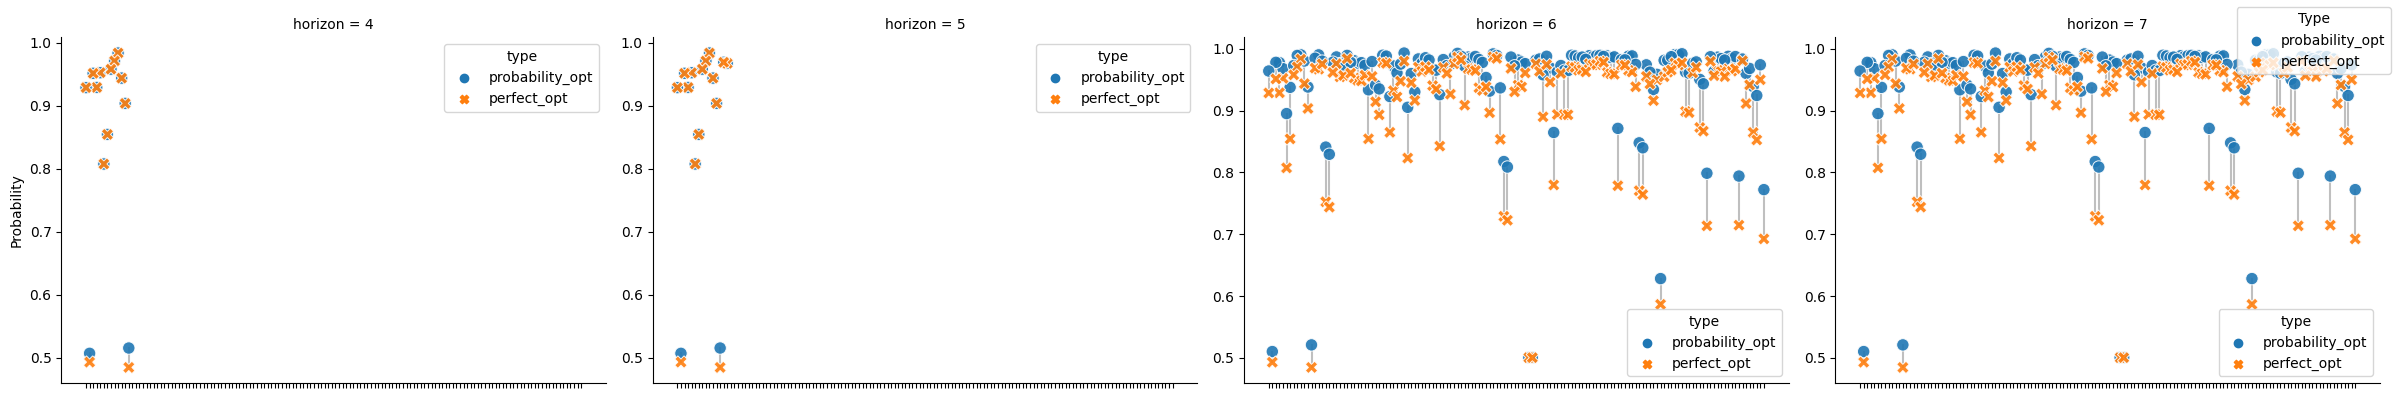

In [4]:
df = get_improvements_df(Experiment.bitflip_ipma, "bellman")

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define color palette manually
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue & orange

# Create FacetGrid
g = sns.FacetGrid(
    df_long,
    col="horizon",
    sharey=False,
    height=4,
    aspect=1.5
)

# --- Draw connecting lines between the two points per scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add the colored scatter points ---
# We call sns.scatterplot separately to respect the hue mapping
for ax, (horizon, subdf) in zip(g.axes.flat, df_long.groupby("horizon")):
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        palette=palette,
        style="type",
        s=80,
        alpha=0.9,
        ax=ax
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Style legend and labels
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()
plt.show()


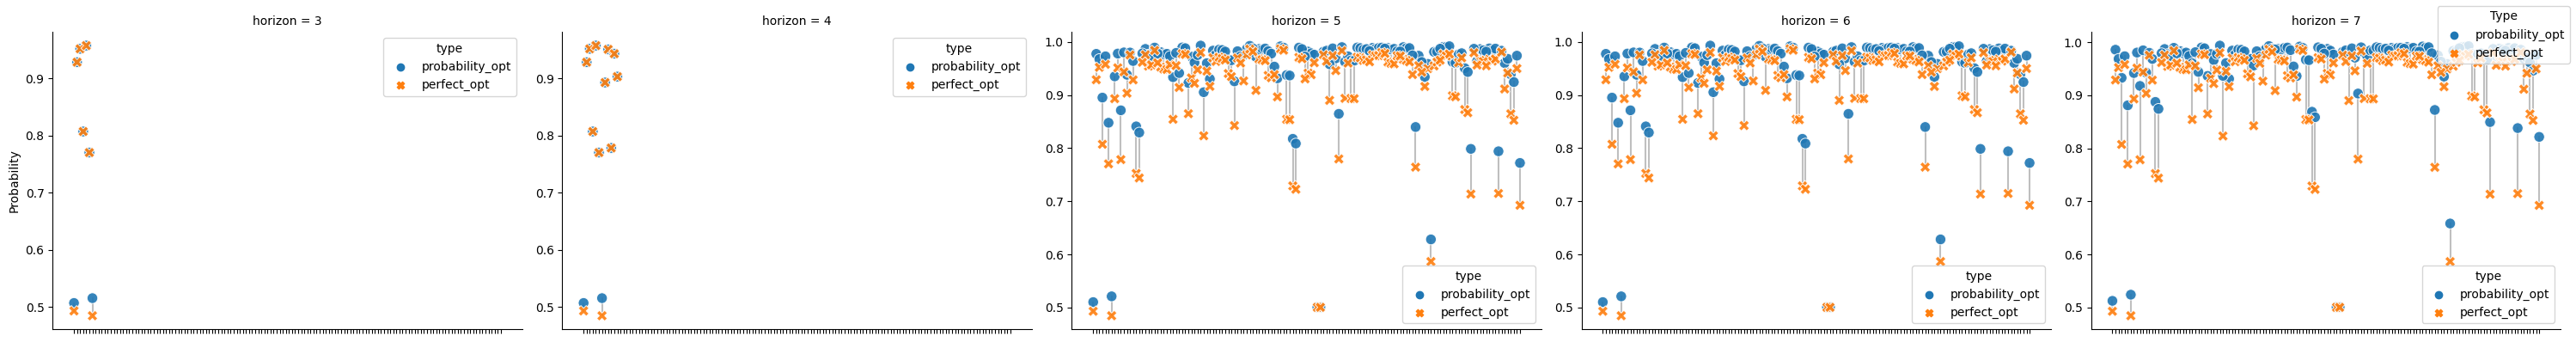

In [5]:
df = get_improvements_df(Experiment.bitflip_ipma2, "bellman")

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define color palette manually
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue & orange

# Create FacetGrid
g = sns.FacetGrid(
    df_long,
    col="horizon",
    sharey=False,
    height=4,
    aspect=1.5
)

# --- Draw connecting lines between the two points per scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add the colored scatter points ---
# We call sns.scatterplot separately to respect the hue mapping
for ax, (horizon, subdf) in zip(g.axes.flat, df_long.groupby("horizon")):
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        palette=palette,
        style="type",
        s=80,
        alpha=0.9,
        ax=ax
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Style legend and labels
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()
plt.show()


In [6]:
df = get_improvements_df(Experiment.bitflip_cxh, "bellman")

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define color palette manually
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue & orange

# Create FacetGrid
g = sns.FacetGrid(
    df_long,
    col="horizon",
    sharey=False,
    height=4,
    aspect=1.5
)

# --- Draw connecting lines between the two points per scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add the colored scatter points ---
# We call sns.scatterplot separately to respect the hue mapping
for ax, (horizon, subdf) in zip(g.axes.flat, df_long.groupby("horizon")):
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        palette=palette,
        style="type",
        s=80,
        alpha=0.9,
        ax=ax
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Style legend and labels
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()
plt.show()


AttributeError: bitflip_cxh

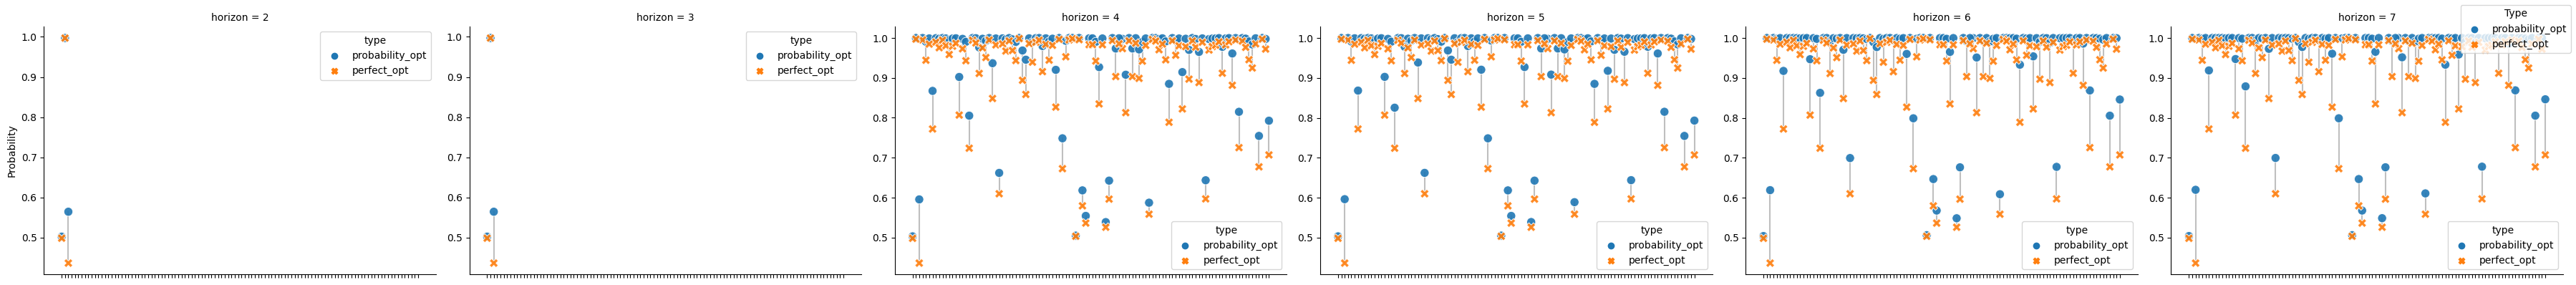

In [10]:
df = get_improvements_df(Experiment.reset, "bellman")

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define color palette manually
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue & orange

# Create FacetGrid
g = sns.FacetGrid(
    df_long,
    col="horizon",
    sharey=False,
    height=4,
    aspect=1.5
)

# --- Draw connecting lines between the two points per scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add the colored scatter points ---
# We call sns.scatterplot separately to respect the hue mapping
for ax, (horizon, subdf) in zip(g.axes.flat, df_long.groupby("horizon")):
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        palette=palette,
        style="type",
        s=80,
        alpha=0.9,
        ax=ax
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Style legend and labels
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()
plt.show()


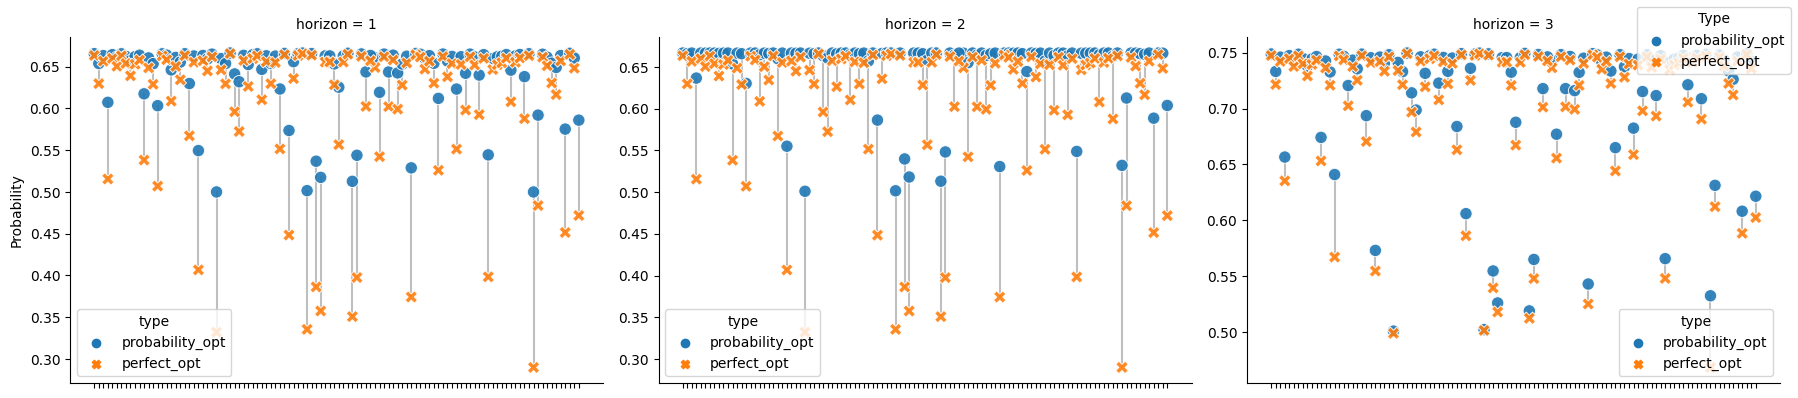

In [12]:
df = get_improvements_df(Experiment.basic_zero_plus_discr, "convex")

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define color palette manually
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue & orange

# Create FacetGrid
g = sns.FacetGrid(
    df_long,
    col="horizon",
    sharey=False,
    height=4,
    aspect=1.5
)

# --- Draw connecting lines between the two points per scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add the colored scatter points ---
# We call sns.scatterplot separately to respect the hue mapping
for ax, (horizon, subdf) in zip(g.axes.flat, df_long.groupby("horizon")):
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        palette=palette,
        style="type",
        s=80,
        alpha=0.9,
        ax=ax
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Style legend and labels
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()
plt.show()


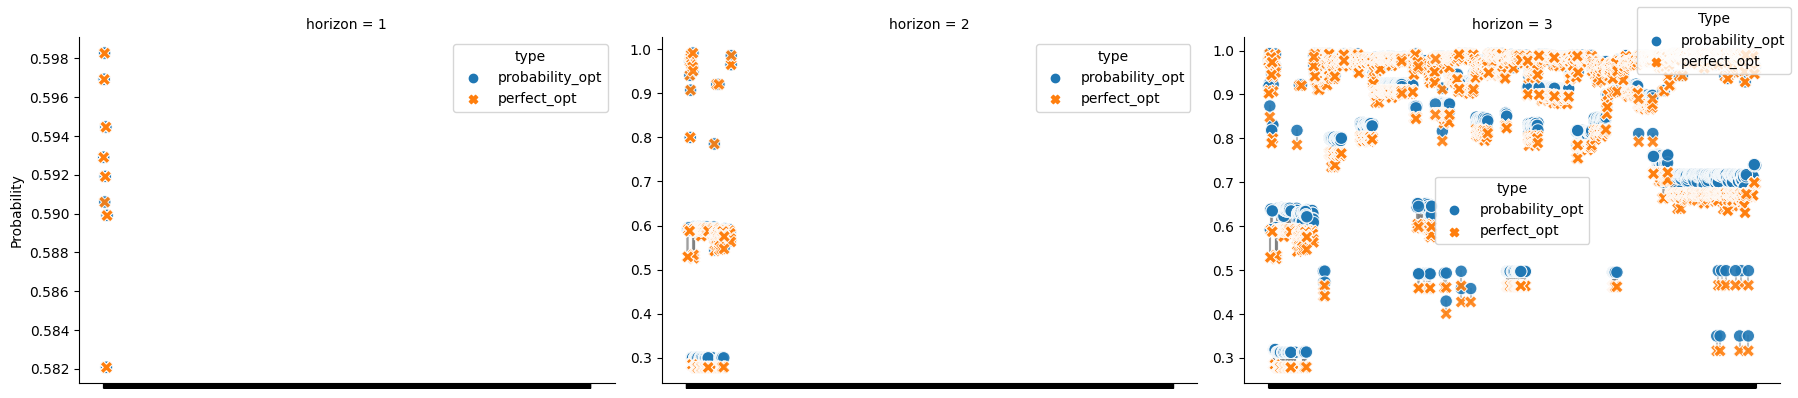

In [11]:
df = get_improvements_df(Experiment.bell_state_reach, "bellman")

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define color palette manually
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue & orange

# Create FacetGrid
g = sns.FacetGrid(
    df_long,
    col="horizon",
    sharey=False,
    height=4,
    aspect=1.5
)

# --- Draw connecting lines between the two points per scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add the colored scatter points ---
# We call sns.scatterplot separately to respect the hue mapping
for ax, (horizon, subdf) in zip(g.axes.flat, df_long.groupby("horizon")):
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        palette=palette,
        style="type",
        s=80,
        alpha=0.9,
        ax=ax
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Style legend and labels
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()
plt.show()


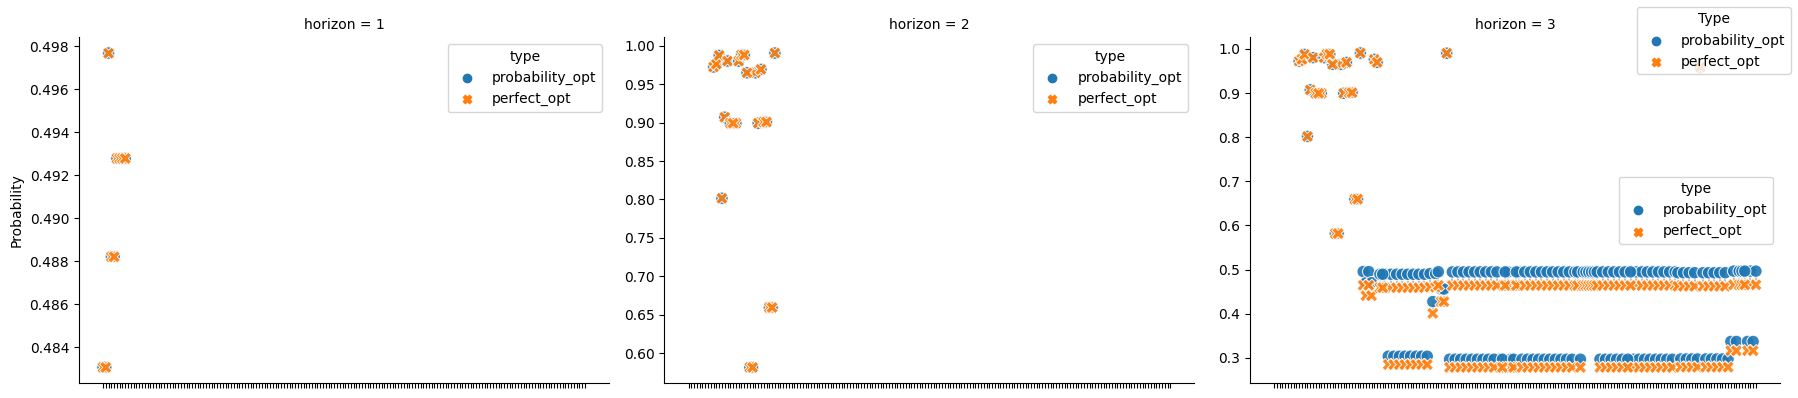

In [8]:
df = get_improvements_df(Experiment.bell_state_reach, "convex")

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define color palette manually
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue & orange

# Create FacetGrid
g = sns.FacetGrid(
    df_long,
    col="horizon",
    sharey=False,
    height=4,
    aspect=1.5
)

# --- Draw connecting lines between the two points per scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add the colored scatter points ---
# We call sns.scatterplot separately to respect the hue mapping
for ax, (horizon, subdf) in zip(g.axes.flat, df_long.groupby("horizon")):
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        palette=palette,
        style="type",
        s=80,
        alpha=0.9,
        ax=ax
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])
    ax.set_xlabel("")

# Style legend and labels
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = get_all_improvements_df()

# Combine hardware and embedding_index into a single label
df["hardware_scenario"] = df["hardware"].astype(str) + "_" + df["embedding_index"].astype(str)

# Reshape to long format for seaborn
df_long = df.melt(
    id_vars=["hardware_scenario", "horizon", "experiment"],
    value_vars=["probability_opt", "perfect_opt"],
    var_name="type",
    value_name="probability"
)

# Define consistent color palette
palette = {"probability_opt": "#1f77b4", "perfect_opt": "#ff7f0e"}  # blue/orange

# Create the facet grid
g = sns.FacetGrid(
    df_long,
    row="experiment",
    col="horizon",
    sharey=False,
    height=3.2,
    aspect=1.4
)

# --- Function to connect points per hardware_scenario ---
def connect_points(data, **kwargs):
    for scenario, group in data.groupby("hardware_scenario"):
        if len(group) == 2:
            plt.plot(
                [scenario, scenario],
                group["probability"].values,
                color="gray",
                alpha=0.5,
                zorder=0
            )

g.map_dataframe(connect_points)

# --- Add scatter points ---
for (experiment, horizon), subdf in df_long.groupby(["experiment", "horizon"]):
    ax = g.axes[g.row_names.index(experiment)][g.col_names.index(horizon)]
    sns.scatterplot(
        data=subdf,
        x="hardware_scenario",
        y="probability",
        hue="type",
        style="type",
        palette=palette,
        s=70,
        alpha=0.9,
        ax=ax,
        legend=False
    )

# --- Clean up axes ---
for ax in g.axes.flat:
    ax.set_xticklabels([])  # remove clutter
    ax.set_xlabel("")

# Add one legend for the entire figure
handles, labels = ax.get_legend_handles_labels()
g.fig.legend(handles, labels, title="Type", loc="upper right")

g.set_axis_labels("", "Probability")
plt.tight_layout()

plt.savefig("figs/all_improv_scatterplots.pdf", dpi=300, bbox_inches='tight')
plt.close()  # optional, closes the figure to free memory